In [1]:
from scipy.signal import butter, filtfilt
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt
from scipy.io import loadmat
import cmath
import pandas as pd

In [14]:
# ARCHIVO .mat
# Este archivo debe tener un registro de al menos 0.7 segundos después de la generación de la falla
mat = loadmat('Falla_AG_15_0001ohm.mat') # El archivo se selecciona desde la interfaz

In [2]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

rawdata = np.loadtxt('sampleSignal.txt', skiprows=0)
signal = rawdata
fs = 100000.0

cutoff = 100
order = 6
conditioned_signal = butter_highpass_filter(signal, cutoff, fs, order)

OSError: sampleSignal.txt not found.

Record has 300001 samples
Sampling rate is 999984 samples/sec.


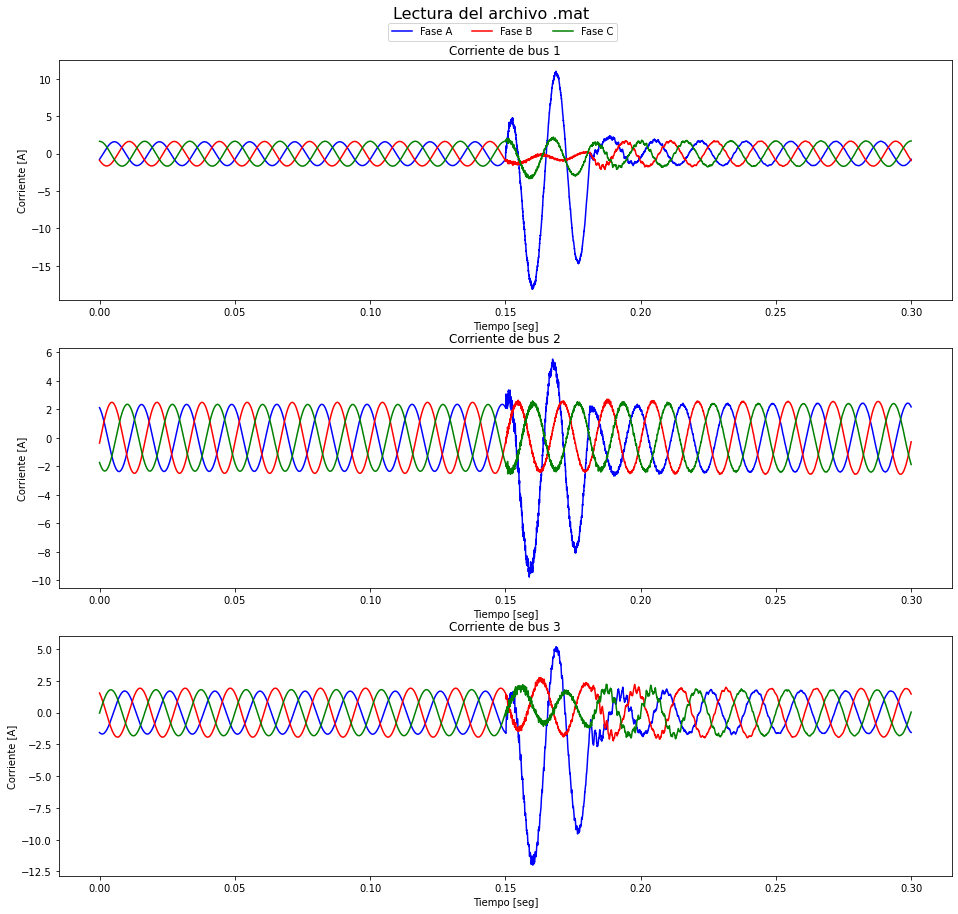

In [23]:
# Reading time vector:
time = mat['t'] #Se conoce que todos los archivos vendrán con este vector incluido

N = len(time)
fs = np.int(np.ceil(len(time)/time[-1])-20)

print('Record has {} samples'.format(N))
print('Sampling rate is {} samples/sec.'.format(fs))


# Line frequency in Hz
fk = 60 # It can be set automatically


# Reading  currents

currents_bus1 = np.empty(([len(time),3]))
currents_bus2 = np.empty(([len(time),3]))
currents_bus3 = np.empty(([len(time),3]))
#voltages_bus2 = np.empty(([len(time),3]))

col=0
for i in ['a','b','c']:    
    currents_bus1[:,col] = mat['iCt1'+i].ravel()
    currents_bus2[:,col] = mat['iCt2'+i].ravel()
    currents_bus3[:,col] = mat['iCt3'+i].ravel()
    col += 1
    
#measures = [voltages_bus1,currents_bus1,voltages_bus2,currents_bus2]
#print(N_tot)
measures = [currents_bus1,currents_bus2,currents_bus3]
            
f, axarr = plt.subplots(3,1, figsize =(16, 15))
f.suptitle('Lectura del archivo .mat', y=0.93, fontsize=16)
labels = ['Fase A', 'Fase B', 'Fase C']

n_bus=1
for i in range(len(measures)):
        p2 = i
        axarr[p2].set_title(('Corriente de bus '+str(n_bus)))
        axarr[p2].set_ylabel('Corriente [A]')        
        
        axarr[p2].set_xlabel('Tiempo [seg]')
        axarr[p2].plot(time, measures[i][:,0], 'b-', label='Fase A')
        axarr[p2].plot(time, measures[i][:,1], 'r-', label='Fase B')
        axarr[p2].plot(time, measures[i][:,2], 'g-', label='Fase C')
        
        n_bus=n_bus+1
        
f.legend(axarr[0].get_lines(), labels, ncol=3, bbox_to_anchor=(0.54, 0.83))

In [10]:
time

array([[0.00000000e+00],
       [9.99999997e-07],
       [1.99999999e-06],
       ...,
       [5.22870012e-02],
       [5.22879995e-02],
       [5.22890016e-02]])

array([[-1.56262159,  1.54676557, -0.02989752],
       [-1.56290305,  1.54662752, -0.02945638],
       [-1.56312943,  1.54618871, -0.02876827],
       ...,
       [-1.48642743,  0.13882738,  1.36338186],
       [-1.4861238 ,  0.13810019,  1.36383343],
       [-1.48582006,  0.137373  ,  1.36428475]])

627480

IndexError: list index out of range

In [61]:
currents_bus1

array([[-0.74611014, -0.89016485,  1.66650534],
       [-0.74561328, -0.89051551,  1.66637075],
       [-0.74508417, -0.89104366,  1.66638207],
       ...,
       [ 0.57040042, -1.62406123,  1.09703255],
       [ 0.57095945, -1.62414515,  1.09655702],
       [ 0.57151836, -1.62422884,  1.09608126]])